In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

# Load the IMDb dataset
max_features = 10000  # consider only the top 10000 words
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

# Pad sequences to a fixed length
maxlen = 256  # truncate or pad reviews to this length
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [2]:
embedding_dim = 128  # size of the word embeddings

model = Sequential([
    Embedding(max_features, embedding_dim, input_length=maxlen),
    LSTM(64),
    Dense(32, activation='relu'),
    Dropout(0.5),  # Dropout for regularization
    Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [3]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()  # Print a summary of the model's layers and parameters

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10


KeyboardInterrupt: 

In [4]:
# Train the model
epochs = 10
batch_size = 64

history = model.fit(x_train, y_train,
                    epochs=epochs,
                    batch_size=batch_size,
                    validation_split=0.2)

Epoch 1/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 153s 480ms/step - accuracy: 0.6765 - loss: 0.5851 - val_accuracy: 0.7956 - val_loss: 0.4339
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 204s 488ms/step - accuracy: 0.8818 - loss: 0.3070 - val_accuracy: 0.8678 - val_loss: 0.3125
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 200s 485ms/step - accuracy: 0.9309 - loss: 0.1998 - val_accuracy: 0.8674 - val_loss: 0.3799
Epoch 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 212s 516ms/step - accuracy: 0.9468 - loss: 0.1580 - val_accuracy: 0.8040 - val_loss: 0.4523
Epoch 5/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 153s 490ms/step - accuracy: 0.9459 - loss: 0.1469 - val_accuracy: 0.8716 - val_loss: 0.3894
Epoch 6/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 152s 485ms/step - accuracy: 0.9634 - loss: 0.1056 - val_accuracy: 0.8586 - val_loss: 0.4866
Epoch 7/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 201s 481ms/step - accuracy: 0.9628 - loss: 0.1046 - val_accuracy: 0.8708 - val_loss: 0.5045
Epoch 8/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 160s 509ms/step - accuracy: 0.9871 -

In [5]:
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {accuracy*100:.2f}%")

# Example of a prediction
# To predict on a new review, you'd need to tokenize and pad it first.
# Here, we'll just predict on a test sample.
sample_review = x_test[0:1]
prediction = model.predict(sample_review)
print(f"Prediction: {prediction[0][0]:.4f}")
print(f"Actual Label: {y_test[0]}")

782/782 ━━━━━━━━━━━━━━━━━━━━ 46s 59ms/step - accuracy: 0.8485 - loss: 0.7358
Test Accuracy: 85.11%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 334ms/step
Prediction: 0.1390
Actual Label: 0


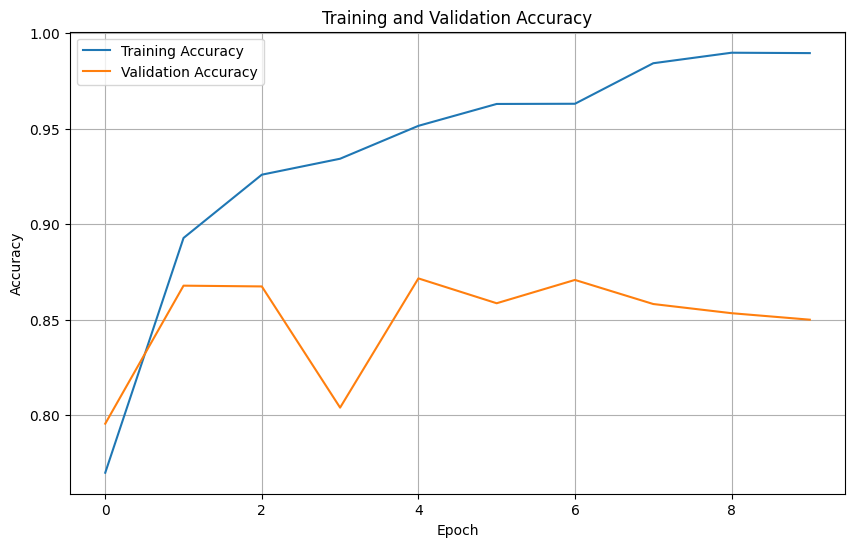

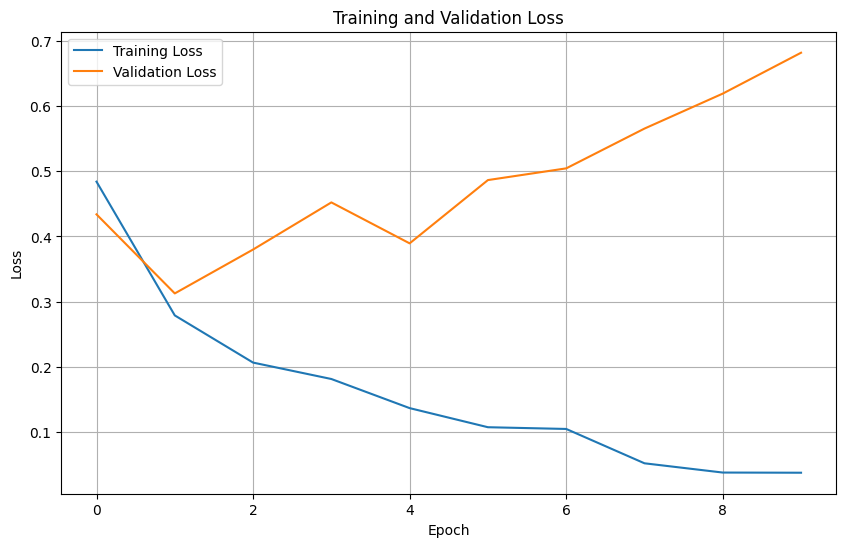

In [7]:
import matplotlib.pyplot as plt
# Plot training and validation accuracy
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Plot training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()